# Depression Classifier (The User Needs Mental Health Treatment or Doesn't Need Mental Health Treatment)

### **Libraries**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Reshape

### **Data Wrangling**

**Gathering Data**

In [2]:
data = pd.read_csv('DepressionData.csv')

**Assessing Data**

In [3]:
data.head()

,Name,Gender,Age,City,WorkOrStudent,Profession,AcademicPress,WorkPress,CGPA,StudySatis,JobSatis,SleepDr,DietHabits,Degree,SuicidalTh,WSHours,FinancialStress,FamHistory,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,Yes
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,Yes
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2556 non-null   object 
 1   Gender           2556 non-null   object 
 2   Age              2556 non-null   int64  
 3   City             2556 non-null   object 
 4   WorkOrStudent    2556 non-null   object 
 5   Profession       1883 non-null   object 
 6   AcademicPress    502 non-null    float64
 7   WorkPress        2054 non-null   float64
 8   CGPA             502 non-null    float64
 9   StudySatis       502 non-null    float64
 10  JobSatis         2054 non-null   float64
 11  SleepDr          2556 non-null   object 
 12  DietHabits       2556 non-null   object 
 13  Degree           2556 non-null   object 
 14  SuicidalTh       2556 non-null   object 
 15  WSHours          2556 non-null   int64  
 16  FinancialStress  2556 non-null   int64  
 17  FamHistory    

**Cleaning Data**

In [5]:
data["JobSatis"] = data["JobSatis"].fillna(data["StudySatis"])

In [6]:
data["WorkPress"] = data["WorkPress"].fillna(data["AcademicPress"])

In [7]:
data = data.rename(columns={"WorkPress": "Pressure", "JobSatis": "Satisfaction"})

In [8]:
data = data.drop(["Name", "Age", "City", "Profession", "CGPA", "Degree", "AcademicPress", "StudySatis"], axis=1)

In [9]:
data.head()

,Gender,WorkOrStudent,Pressure,Satisfaction,SleepDr,DietHabits,SuicidalTh,WSHours,FinancialStress,FamHistory,Depression
0,Female,Working Professional,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,Working Professional,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,Yes
2,Female,Working Professional,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,Working Professional,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,Yes
4,Male,Working Professional,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,Yes


In [10]:
le_Gender = LabelEncoder()
le_WorkOrStudent = LabelEncoder()
le_Pressure = LabelEncoder()
le_Satisfaction = LabelEncoder()
le_SleepDr = LabelEncoder()
le_DietHabits = LabelEncoder()

In [11]:
if "Gender" in data.columns:
  data["Gender"] = le_Gender.fit_transform(data["Gender"])
if "WorkOrStudent" in data.columns:
  data["WorkOrStudent"] = le_WorkOrStudent.fit_transform(data["WorkOrStudent"])
if "Pressure" in data.columns:
  data["Pressure"] = le_Pressure.fit_transform(data["Pressure"])
if "Satisfaction" in data.columns:
  data["Satisfaction"] = le_Satisfaction.fit_transform(data["Satisfaction"])
if "SleepDr" in data.columns:
  data["SleepDr" ] = le_SleepDr.fit_transform(data["SleepDr" ])
if "DietHabits" in data.columns:
  data["DietHabits"] = le_DietHabits.fit_transform(data["DietHabits"])

In [12]:
if "SuicidalTh" in data.columns:
  data["SuicidalTh"] = data["SuicidalTh"].apply(lambda x: 1 if x == "Yes" else 0)
if "FamHistory" in data.columns:
  data["FamHistory"] = data["FamHistory"].apply(lambda x: 1 if x == "Yes" else 0)
if "Depression" in data.columns:
  data["Depression"] = data["Depression"].apply(lambda x: 1 if x == "Yes" else 0)

In [13]:
data = data.fillna(data.mean(numeric_only = True))

In [14]:
oldData_length = data.shape[0]

In [15]:
data = data.drop_duplicates()

In [16]:
newData_length = data.shape[0]

In [17]:
print(f"Total data before removing duplicates: {oldData_length}")
print(f"Total data after removing duplicates: {newData_length}")

Total data before removing duplicates: 2556
Total data after removing duplicates: 2541


In [18]:
data.head()

,Gender,WorkOrStudent,Pressure,Satisfaction,SleepDr,DietHabits,SuicidalTh,WSHours,FinancialStress,FamHistory,Depression
0,0,1,1,3,1,1,0,6,2,0,0
1,1,1,3,2,0,2,1,0,4,1,1
2,0,1,1,2,0,1,0,0,2,0,0
3,0,1,2,4,1,0,1,1,2,1,1
4,1,1,3,2,1,1,1,6,5,1,1


### **Training the Model**

**Training the Data**

In [19]:
data_train = data.sample(frac=0.8, random_state=42)
data_test = data.drop(data_train.index)

In [20]:
x_train = data_train.drop(columns = ["Depression"]).astype(np.float32)
y_train = data_train["Depression"].astype(np.float32)
x_test = data_test.drop(columns = ["Depression"]).astype(np.float32)
y_test = data_test["Depression"].astype(np.float32)

In [21]:
model = Sequential([
    Dense(64, activation = "relu", input_dim = x_train.shape[1]),
    Reshape((1, 64)),
    SimpleRNN(64, activation = "relu", return_sequences = False),
    Dense(32, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [23]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.2)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6623 - loss: 0.6086 - val_accuracy: 0.7469 - val_loss: 0.4631
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7529 - loss: 0.4666 - val_accuracy: 0.8624 - val_loss: 0.3392
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8874 - loss: 0.3245 - val_accuracy: 0.9091 - val_loss: 0.2074
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9418 - loss: 0.1948 - val_accuracy: 0.9459 - val_loss: 0.1282
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9466 - loss: 0.1320 - val_accuracy: 0.9607 - val_loss: 0.1016
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9532 - loss: 0.1323 - val_accuracy: 0.9754 - val_loss: 0.0796
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9621 - loss: 0.1005 - val_accuracy: 0.9803 - val_loss: 0.0687
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.0938 - val_accuracy: 0.9828 - val_

In [24]:
evaluation = model.evaluate(x_test, y_test, return_dict = True)
print("Evaluation Model:", evaluation)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9870 - loss: 0.0383 
Evaluation Model: {'accuracy': 0.9881889820098877, 'loss': 0.03906705975532532}


**Threshold**

In [25]:
prediction = (model.predict(x_test) > 0.5).astype(int)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [26]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9881889763779528


**Evaluation Matrix**

In [27]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       164
         1.0       0.99      0.99      0.99       344

    accuracy                           0.99       508
   macro avg       0.99      0.99      0.99       508
weighted avg       0.99      0.99      0.99       508



**Confusion Matrix**

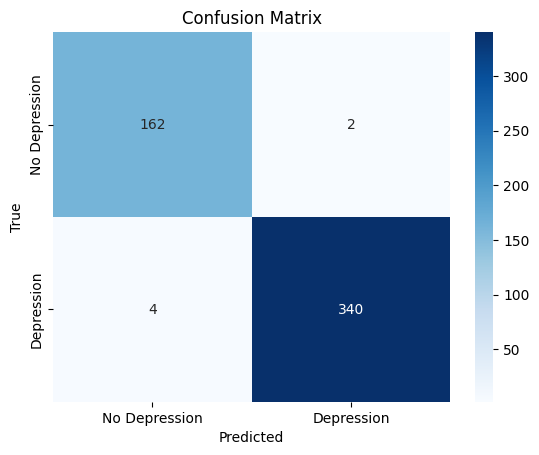

In [28]:
confMatrix = confusion_matrix(y_test, prediction)
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["No Depression", "Depression"], yticklabels = ["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### **Save the Model**

In [29]:
# model.save("SoulSync_Model.h5")
# print("Successfully saved the model")

### **Testing the Model**

In [30]:
from tensorflow.keras.models import load_model

In [31]:
loadedModel = load_model("SoulSync_Model.h5")
print("Successfully loaded the model")

Successfully loaded the model


In [32]:
def validateInput(userInput, inputType, validRange = None):
    try:
        userInput = inputType(userInput)

        if validRange:
            if userInput not in validRange:
                raise ValueError(f"Input must be within range {validRange}")

        return userInput
    except ValueError:
        raise ValueError("Invalid Input")

In [33]:
def testModel(loadedModel):
    try:
        gender = validateInput(input("Enter your gender (0/1): "), int, range(0, 2))
        workorstudent = validateInput(input("Enter your job (0/1): "), int, range(0, 2))
        pressure = validateInput(input("How are your work or study pressure (1/2/3/4/5): "), int, range(1, 6))
        satisfaction = validateInput(input("How are your work or study satisfaction (1/2/3/4/5): "), int, range(1, 6))
        sleepdr = validateInput(input("How are your sleep duration (0/1/2/3): "), int, range(0, 4))
        diethabits = validateInput(input("How are your dietary habits (0/1/2): "), int, range(0, 3))
        suicidalth = validateInput(input("Have you ever experienced suicidal thoughts (0/1): "), int, range(0, 2))
        wshours = validateInput(input("Enter your work or study hours (0/1/2/3/4/5/6/7/8/9/10/11/12): "), int, range(0, 13))
        financialstress = validateInput(input("Enter your financial stress (1/2/3/4/5): "), int, range(1, 6))
        famhistory = validateInput(input("Does your family have a history of mental illness (0/1): "), int, range(0, 2))

        userInput = {
            "Gender" : gender,
            "WorkOrStudent" : workorstudent,
            "Pressure" : pressure,
            "Satisfaction" : satisfaction,
            "SleepDr" : sleepdr,
            "DietHabits" : diethabits,
            "SuicidalTh" : suicidalth,
            "WSHours" : wshours,
            "FinancialStress" : financialstress,
            "FamHistory" : famhistory
        }


        input_df = pd.DataFrame([userInput])

        inputData = input_df.values.reshape(1, -1)

        prediction = model.predict(inputData)

        if prediction[0][0] > 0.5:
            print("Prediction: Depression")
        else:
            print("Prediction: No Depression")

    except ValueError as e:
        print(f"Error: {e}")

In [34]:
testModel(loadedModel)

Enter your gender (0/1): 1
Enter your job (0/1): 0
How are your work or study pressure (1/2/3/4/5): 4
How are your work or study satisfaction (1/2/3/4/5): 2
How are your sleep duration (0/1/2/3): 0
How are your dietary habits (0/1/2): 1
Have you ever experienced suicidal thoughts (0/1): 1
Enter your work or study hours (0/1/2/3/4/5/6/7/8/9/10/11/12): 11
Enter your financial stress (1/2/3/4/5): 4
Does your family have a history of mental illness (0/1): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Prediction: Depression
